#### Linear Regression using the California Housing Dataset, covering key regression concepts including:
    Exploratory Data Analysis (EDA)
    Train-Test Split
    Feature Scaling
    Model Training (Linear Regression, Ridge, Lasso, Elastic Net)
    Model Evaluation (Metrics like RMSE, R², MAE)
    Hyperparameter Tuning

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing
import os
# print(os.getcwd())

#### loading california housing dataset

In [2]:
data =fetch_california_housing()
df=pd.DataFrame(data.data,columns=data.feature_names)
df["Target"]=data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

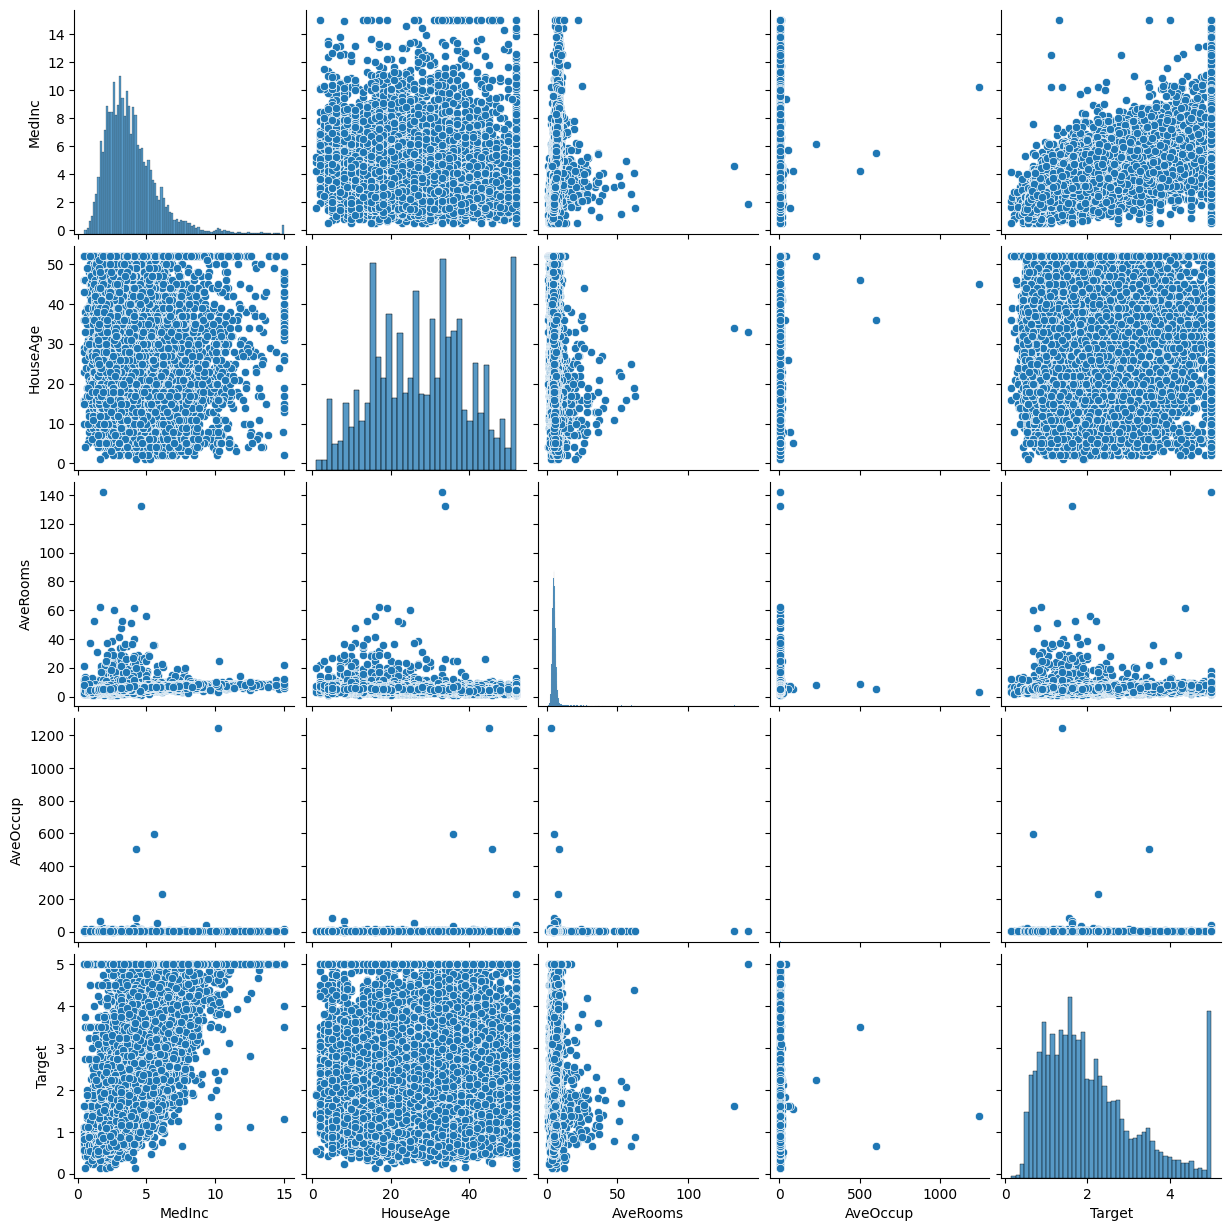

In [3]:
print(df.info())
print(df.describe())

sns.pairplot(df[["MedInc","HouseAge","AveRooms","AveOccup","Target"]])
plt.show()

#### Split data into features and target - train_testsplit

In [4]:
X=df.drop(columns=["Target"])
y=df.Target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (16512, 8)
X_test: (4128, 8)
y_train: (16512,)
y_test: (4128,)


#### Feature Scaling

In [5]:
scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Function to evalute the model

In [6]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}\n")

#### Train Linear Regression Model

In [7]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
evaluate_model(lr, X_test_scaled, y_test)

Model: LinearRegression
RMSE: 0.7456
MAE: 0.5332
R² Score: 0.5758



In [8]:
# Train Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
evaluate_model(ridge, X_test_scaled, y_test)

Model: Ridge
RMSE: 0.7456
MAE: 0.5332
R² Score: 0.5758



In [9]:
# Train Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
evaluate_model(lasso, X_test_scaled, y_test)

Model: Lasso
RMSE: 0.8244
MAE: 0.6222
R² Score: 0.4814



In [10]:
# Train ElasticNet Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)
evaluate_model(elastic_net, X_test_scaled, y_test)

Model: ElasticNet
RMSE: 0.7974
MAE: 0.5970
R² Score: 0.5148



In [11]:
# Hyperparameter Tuning for Ridge, Lasso, and ElasticNet
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [12]:

ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, y_train)
print("Best Ridge alpha:", ridge_cv.best_params_)

Best Ridge alpha: {'alpha': 0.01}


In [13]:
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
lasso_cv.fit(X_train_scaled, y_train)
print("Best Lasso alpha:", lasso_cv.best_params_)

Best Lasso alpha: {'alpha': 0.01}


In [43]:
elastic_cv = GridSearchCV(ElasticNet(l1_ratio=0.5), param_grid, cv=5, scoring='r2')
elastic_cv.fit(X_train_scaled, y_train)
print("Best ElasticNet alpha:", elastic_cv.best_params_)

Best ElasticNet alpha: {'alpha': 0.01}


### Model class

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

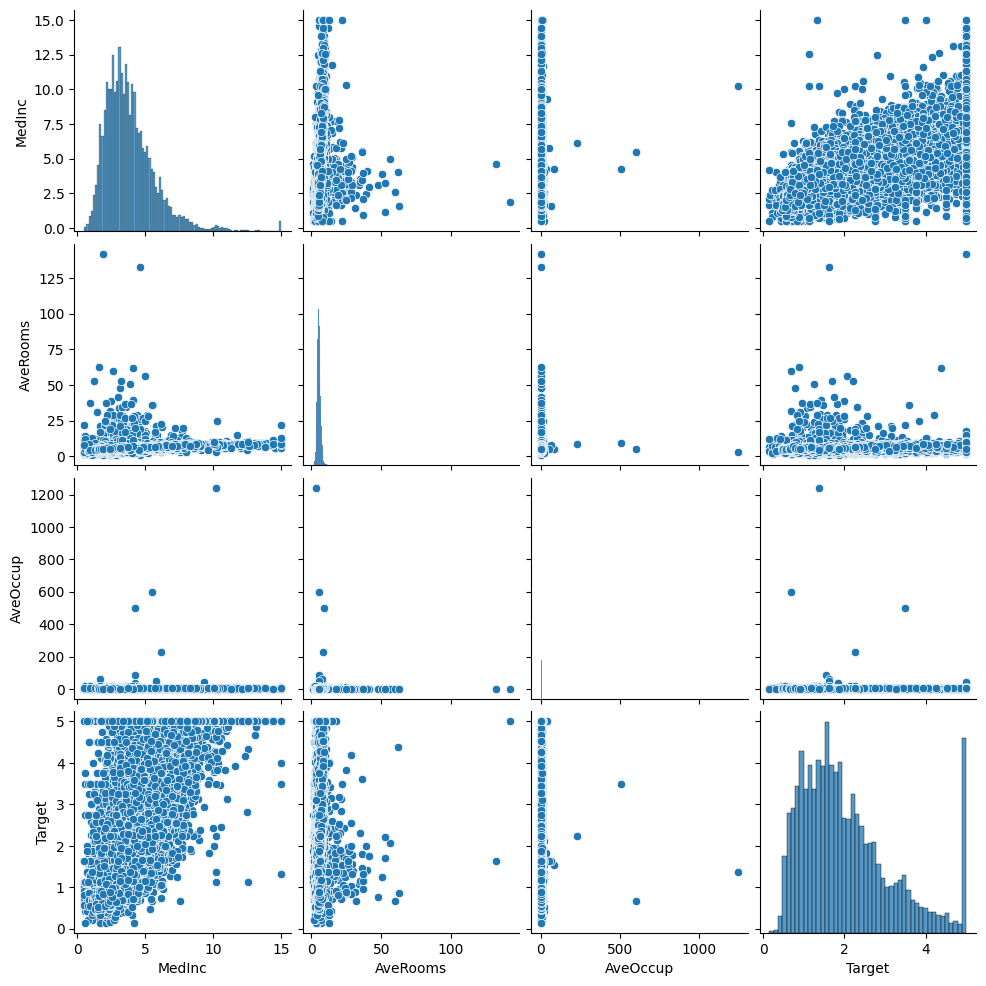

Model: LinearRegression
RMSE: 0.7456
MAE: 0.5332
R² Score: 0.5758

Model: Ridge
RMSE: 0.7456
MAE: 0.5332
R² Score: 0.5758

Model: Lasso
RMSE: 0.8244
MAE: 0.6222
R² Score: 0.4814

Model: ElasticNet
RMSE: 0.7974
MAE: 0.5970
R² Score: 0.5148

Best Ridge alpha: {'alpha': 10}
Best Lasso alpha: {'alpha': 0.01}
Best ElasticNet alpha: {'alpha': 0.01}


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing

class RegressionModel:
    def __init__(self, model):
        self.model = model
        self.scaler = StandardScaler()
    
    def fit(self, X_train, y_train):
        X_train_scaled = self.scaler.fit_transform(X_train)
        self.model.fit(X_train_scaled, y_train)
    
    def predict(self, X_test):
        X_test_scaled = self.scaler.transform(X_test)
        return self.model.predict(X_test_scaled)
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"Model: {self.model.__class__.__name__}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"R² Score: {r2:.4f}\n")

# Load California Housing Dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

# Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())
sns.pairplot(df[['MedInc', 'AveRooms', 'AveOccup', 'Target']])
plt.show()

# Split data into features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

for name, model in models.items():
    reg_model = RegressionModel(model)
    reg_model.fit(X_train, y_train)
    reg_model.evaluate(X_test, y_test)

# Hyperparameter Tuning for Ridge, Lasso, and ElasticNet
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)
print("Best Ridge alpha:", ridge_cv.best_params_)

lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)
print("Best Lasso alpha:", lasso_cv.best_params_)

elastic_cv = GridSearchCV(ElasticNet(l1_ratio=0.5), param_grid, cv=5, scoring='r2')
elastic_cv.fit(X_train, y_train)
print("Best ElasticNet alpha:", elastic_cv.best_params_)
